Let's assume that the scattering center lies on the origin of the coordinate system and write the equation of motion in Cartesian coordinates.  

The Lagrangian of the system is $\mathcal{L}=\frac{1}{2}m\dot{x}^2+\frac{1}{2}m\dot{y}^2-4V_0a^6[\frac{a^6}{(x^2+y^2)^6}-\frac{1}{(x^2+y^2)^3}]$. So that the equations of motion are:
$$\ddot{x}=-\frac{4V_0a^6}{m}2x[-\frac{6a^6}{(x^2+y^2)^7}+\frac{3}{(x^2+y^2)^4}];$$
$$\ddot{y}=-\frac{4V_0a^6}{m}2y[-\frac{6a^6}{(x^2+y^2)^7}+\frac{3}{(x^2+y^2)^4}].$$

The initial conditions are:
$$x(t=0)=-\infty, \dot{x}(t=0)=v_0;$$
$$y(t=0)=b, \dot{y}(t=0)=0.$$

In the program we set $x(t=0)$ to be a negative number with very large absolute value. 

From above we know that the energy of the particle is $E=\frac{1}{2}mv_0^2$ which is conserved.

When $E\leq V_0$ while $b$ is large, the particle scatters under an attrctive potential, where as it scatters under a repulsive potential while b is small. So that when b is large the defelction angle $\theta$ is negative while when $b$ is small $\theta$ is positive. When particle is under a repulsive potential, the nearer it passes by the scattering center, the larger the deflection angle so that the defelction function should be monotonic decreasing in this range. While when $b$ is large there should be turning point so that the defelction function cannot be a monotonic function since finally when $b\rightarrow\infty$ the particle won't be scattered much by the potential. 

The defelction function bahaves somehow like the potential function(Lennard-Jones potential). The deflection angle shall decrease from a large positive angle as $b$ increases until it reaches 0. Beyond that point the deflection angle decreases as $b$ increases until it hits the minimum. Then it shall increase as $b$ increases and remains negative. Finally it approaches 0 when $b\rightarrow\infty$

When $E\gg V_0$, the attractive pocket can be neglected. Also the repulsive part of the potential decreases steeply as $b$ increases. So that it can be well approximated by a hard sphere potential. The defelction function should then behave like a particle scattering under hard sphere potential. 

Now we apply Verlet's method to give a numerical solution to the problem. For simplicity we assume that the poetantial constant $V_0=1$.

The equations of motion then becomes 
$$\ddot{x}=-4a^6(2x)\frac{1}{m}[-\frac{6a^6}{(x^2+y^2)^7}+\frac{3}{(x^2+y^2)^4}];$$
$$\ddot{y}=-4a^6(2y)\frac{1}{m}[-\frac{6a^6}{(x^2+y^2)^7}+\frac{3}{(x^2+y^2)^4}].$$

The reduced forced of the problem are
$$F_x=-4a^6(2x)\frac{1}{m}[-\frac{6a^6}{(x^2+y^2)^7}+\frac{3}{(x^2+y^2)^4}];$$
$$F_y=-4a^6(2y)\frac{1}{m}[-\frac{6a^6}{(x^2+y^2)^7}+\frac{3}{(x^2+y^2)^4}].$$

Now we can proceed to calculate deflection function $\Theta(b)$. The final result will be shown as a plot. In the calculation we choose $r_{max}=5, x(t=0)=-50, v_x(t=0)=2, m=1, a^6=1$ so that $b$ goes from 0 to 5. 

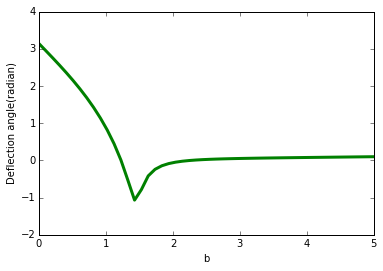

In [148]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

mass = 1.
a6 = 1.
b0 = 0.
dt = 0.01
tmax = 50
nsteps = int(tmax/dt)

E = 0.5*mass*vx0*vx0

rmax = 5.
db = 0.1
nb = int(rmax/db)
theta = np.zeros(nb)
b = np.linspace(b0,rmax,nb)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)

x0 = -50.
y0 = b[0]
vx0 = 2.
vy0 = 0.

class particle2(object):    
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
    def get_force(self, fx, fy): 
        r2 = self.x*self.x+self.y*self.y
        r8 = r2 * r2 * r2 * r2
        r16 = r8 * r8
        r14 = r16/r2
        fx = -8*self.x*a6*(-6*a6/r14+3/r8)
        fy = -8*self.y*a6*(-6*a6/r14+3/r8)
        fx /= self.mass
        fy /= self.mass 
        
    def verlet(self, dt):
        self.get_force(fx, fy) 
        self.x += self.vx*dt + 0.5*fx*dt*dt
        self.y += self.vy*dt + 0.5*fy*dt*dt
        self.vx += 0.5*fx*dt
        self.vy += 0.5*fy*dt
        self.get_force(fx, fy) 
        self.vx += 0.5*fx*dt
        self.vy += 0.5*fy*dt
        
vx[0] = vx0
vy[0] = vy0  
x[0] = x0

for j in range(0,nb):
    y[0] = b[j]
    p = particle2(mass, x[0], y[0], vx[0], vy[0])
    
    for i in range(1,nsteps):
        r2 = p.x*p.x+p.y*p.y
        r8 = r2 * r2 * r2 * r2
        r16 = r8 * r8
        r14 = r16/r2
        fx = -8*p.x*a6*(-6*a6/r14+3/r8)
        fy = -8*p.y*a6*(-6*a6/r14+3/r8)
        p.verlet(dt)

        x[i] = p.x
        y[i] = p.y
        vx[i] = p.vx
        vy[i] = p.vy
    
    xf = x[nsteps-1]
    yf = y[nsteps-1]
    theta[j] = math.atan2(yf,xf)

pyplot.plot(b, theta, color='green', ls='-', lw=3)
pyplot.xlabel('b')
pyplot.ylabel('Deflection angle(radian)');

Now we proceed to calculate different deflection functions for different initial values of energy.

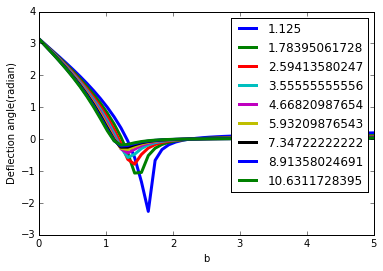

In [141]:
mass = 1.

vx0max = 5.
vx0step = 0.5
nvx0 = int(vx0max/vx0step)
vx00 = 1.5

vx0 = np.linspace(vx00,vx0max,nvx0)
E = np.zeros(nvx0)

ntheta = np.zeros(shape=(nvx0,nb))

for k in range(0,nvx0):
    
    for j in range(0,nb):
        x[0] = x0
        y[0] = b[j]
        vx[0] = vx0[k]
        E[k] = 0.5*vx[0]*vx[0]
        vy[0] = vy0
        p = particle2(mass, x[0], y[0], vx[0], vy[0])
    
        for i in range(1,nsteps):
            r2 = p.x*p.x+p.y*p.y
            r8 = r2 * r2 * r2 * r2
            r16 = r8 * r8
            r14 = r16/r2
            fx = -8*p.x*a6*(-6*a6/r14+3/r8)
            fy = -8*p.y*a6*(-6*a6/r14+3/r8)
            p.verlet(dt)

            x[i] = p.x
            y[i] = p.y
            vx[i] = p.vx
            vy[i] = p.vy
    
        xf = x[nsteps-1]
        yf = y[nsteps-1]
        ntheta[k,j] = math.atan2(yf,xf)
        E[k] = 0.5*mass*vx0[k]*vx0[k]

for i in range(0,nvx0-1):
    pyplot.plot(b, ntheta[i,:], ls='-', lw=3, label=str(E[i]))
    pyplot.legend()
    
pyplot.xlabel('b')
pyplot.ylabel('Deflection angle(radian)');

There we got the dependence of deflection function on energy $E$.

Next we show a typical trajectory of the particle which we can see from the plot that it exhibits a motion under attractive potential. 

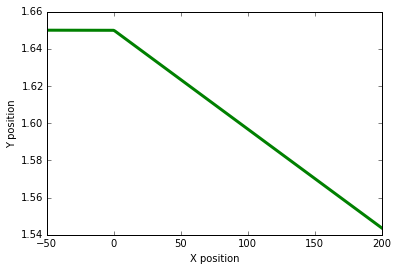

In [185]:
mass = 1.
a6 = 1.
b0 = 1.65
dt = 0.01
tmax = 50.
nsteps = int(tmax/dt)

E = 0.5*mass*vx0*vx0

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)

x0 = -50.
y0 = b0
vx0 = 5.
vy0 = 0.

x[0] = x0
y[0] = b0
vx[0] = vx0
vy[0] = vy0  

p = particle2(mass, x[0], y[0], vx[0], vy[0])
    
for i in range(1,nsteps):
    r2 = p.x*p.x+p.y*p.y
    r8 = r2 * r2 * r2 * r2    
    r16 = r8 * r8
    r14 = r16/r2
    fx = -8*p.x*a6*(-6*a6/r16+3/r14)
    fy = -8*p.y*a6*(-6*a6/r16+3/r14)
    p.verlet(dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
    
pyplot.plot(x, y, color='green', ls='-', lw=3)
pyplot.xlabel('X position')
pyplot.ylabel('Y position');

The trajectory bends towards the scattering center. 

In order to solve the equations of motion we write it in polar coordinate.

We have 
$$\mathcal{L}=\frac{1}{2}m\dot{r}^2+\frac{1}{2}mr^2\dot{\theta}^2-4V_0a^6[\frac{a^6}{r^{12}}-\frac{1}{r^6}].$$

So that the equations of motion are 
$$mr^2\dot{\theta}=L\equiv Constant;$$
$$m\ddot{r}=-4V_0a^6[\frac{-12a^6}{r^{13}}+\frac{6}{r^7}].$$

So that we obtain
$$E=\frac{1}{2}m\dot{r}^2+\frac{L^2}{2mr^2}+4V_0a^6[\frac{a^6}{r^{12}}-\frac{1}{r^6}]$$

So that we get a solution to the equations of motion
$$t-t_0=\int_{r_0}^{r}\frac{dr}{\sqrt{\frac{2}{m}(E-V-\frac{L^2}{2mr^2})}}$$
where $L=mv_0b$.

Now we get a function $r=r(t;E,b)$ where $E$ and $b$ serve as parameters. 

If there is an orbiting trajectory, then $r(t)<\infty$ for arbitrary value of $t$. So we can solve for a threshold energy that the particle stop orbiting the scattering center.

We convert the integral equation to a differetial equation
$$\frac{dr}{dt}=\sqrt{\frac{2}{m}(E-V-\frac{L^2}{2mr^2})}.$$

Now we can apply Euler's method to solve this equation. 

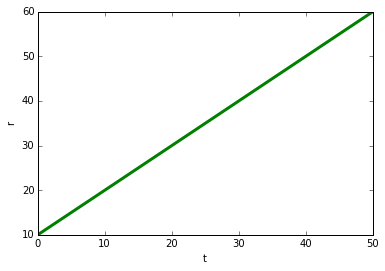

In [201]:
mass = 1.
a6 = 5. 

dt = 0.01
tmax = 50.
nsteps = int(tmax/dt)

t = np.linspace(0.,tmax,nsteps)
r = np.zeros(nsteps)

r0 = 10.
b = 1.

L = 1.
E = 0.5*L*L/(mass*b*b)

r[0] = r0

for i in range (1,nsteps):
    r[i] = r[i-1]+math.sqrt(2/mass*(E-4*a6*(a6/r[i-1]**12-1/r[i-1]**6)-L*L/(2*mass*r[i-1]**2)))*dt
    
pyplot.plot(t, r, color='green', ls='-', lw=3)
pyplot.xlabel('t')
pyplot.ylabel('r');

By adjusting the parameters $b$ and $E$ we can observe whether an orbit is closed or extends to infinity. 